# Working with Vector Data

Working with Vector data is an essential component of GIS. In the original flow chart from Lab 01, we are will normally have an 'area of interest' that we want to better understand. For instance, we may want to find a vegetation index within the country of Columbia. To do that, we can work with a polygon that denotes the border of Columbia, and then combine it with GEE to summarize the index.

Working with vector data is quite expansive and outside of the scope of this course. While GEE is excellent at processing large amounts of raster data, we will introduce a few other tools that are more focused on vector operations.

![Building a use Case Flowchart](https://loz-webimages.s3.amazonaws.com/GEE_Labs/03_01.png)

In [8]:
#!pip install geemap
import ee, geemap
#ee.Authenticate()
def build_map(lat, lon, zoom, vizParams, image, name):
    map = geemap.Map(center = [lat, lon], zoom = zoom)
    map.addLayer(image, vizParams, name)
    return map

# Initialize the Earth Engine module.
ee.Initialize()

### Geospatial Data

Geospatial Analysis is a pretty vast topic, so we are only going to cover the basics and then provide a few resources for you to follow along with. 

As mentioned earlier, a basic definition of vector data is points, lines, and polygons associated with attribute data. A few examples might be:

1. Polygon that denotes the boundary of France
2. Line that denotes the Mississippi River, along with information about river width.
3. Points that denote the center of all the capitals of South America, along with population

Each of the different vector types have different operations associated with them.
1. Is the city of Richmond (point) within the state of North Carolina (polygon)?
2. Does Interstate-77 cross the Mississippi river (two lines)? 
3. What is the overall area of France (polygon)?

[Data Carpentry](https://datacarpentry.org/organization-geospatial/02-intro-vector-data/) provides some good information that will help provide some good examples. 

### Vector Data Types
There are a surpringly large number of vector datatypes. You've likely heard of `shapefiles`, which originated as an ESRI (Makers of Arc-GIS) propritary format of transferring data, but was then open-sourced and is the most prominent vector data type. However, there's some downsides.
1. At a minimum, it's four separate files (projection, attributes, metadata, geometries)
2. A shapefile can only be one type (cannot mix and match points and polygons)
3. Designed in the 1980s
4. 2GB size limitation

In recent years, there's other spatial data types to address these limitations. A few newer types:
1. geojson
2. geopkg
3. postgis
4. feather/pyarrow
5. parquet

Bottom line - be able to recognize spatial datatypes and know some of the limitations of shapefiles.

### Geopandas
In Python, there's a cascade of geospatial packages that build upon each other - the most common and prevalent package for working with vector data is called `geopandas`. Again, getting very comfortable with `geopandas` will take a few weeks but it is an essential tool for working with geospatial packages. Additionally, it has data that you can reference immediately, without having to go out and find your own data. 

Geopandas supports all the spatial data types above, but the biggest benefit is that you can then interact with the spatial data frame using Pandas, which is a staple library in data. Whichever type of vector data you read in, whether it is a shapefile, a geojson or a parquet file, when you read it in it becomes a `geopandas` dataframe. Let's see an example.

In [19]:
import geopandas as gpd
# Available datasets in geopandas
print(gpd.datasets.available)

['naturalearth_cities', 'naturalearth_lowres', 'nybb']


In [ ]:
# Country boundaries within geopandas 
world_filepath = gpd.datasets.get_path('naturalearth_lowres')

In [10]:
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Filter
We can filter it down based on the attribute data in the dataset. Under continent, we can filter to only include the countries within Africa. That reduces our dataset, and then we can continue to filter it down to the country of Niger. Let's plot the country outline to make sure it works correctly. 

In [11]:
df_africa = world.loc[world.continent == 'Africa']
df_africa.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


In [12]:
niger = df_africa.loc[df_africa.name == 'Niger']
niger.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
55,19245344,Africa,Niger,NER,20150.0,"POLYGON ((14.85130 22.86295, 15.09689 21.30852..."


<AxesSubplot:>

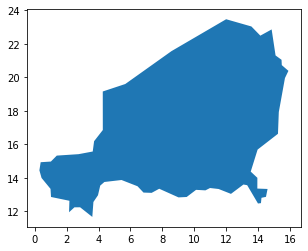

In [13]:
niger.plot()

### Convert to Earth Engine

We have a polygon that contains the boundary of Niger that is in a `geopandas` format. We now have to convert it into an Earth Engine feature so that GEE can interact with it. The easiest way to do this is using the `geemap` package. Additionally, we can plot it on the map (using `geemap`)to ensure the data looks correct. 

In [14]:
gee_feature = geemap.geopandas_to_ee(niger)

In [15]:
Map = geemap.Map()
Map.addLayer(gee_feature, {}, "geopandas to ee example")
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

#### Exercise 1
1. Use the geopandas method above to get the boundary of the country of your study area, convert it to a GEE feature and plot it.

#### Exercise 2
2. Use `print(gpd.datasets.available)` to see the other datasets available.
3. Read in one of the datasets and look at the dataframe
4. Filter the dataset down to a manageable size
5. Convert to a GEE feature
6. Plot it

## Importing Shapefiles
Using `geopandas` is the preferred method as it's flexible for many different datatypes and supports a wide array of operations before you convert into a GEE feature. However, in some cases you might want to just read in a shapefile directly. Follow along with the [notebook](https://geemap.org/notebooks/10_shapefiles/) to understand the basic operations of using shapefiles

#### Exercise 3

1. Find a shapefile of your study area and download it
2. Add the path to the shapefile into your notebook (easiest method is to just bring the shapefile into the same location as your notebook)
3. Convert it into GEE feature
4. Plot the result

# Sample Solution to Exercise 3

1. Download administrative units shapefile for the country of Nigeria from the World Bank 
* [Data Catalog](https://datacatalog.worldbank.org/search/dataset/0039368)
2. Put all files associated with the shapefile in a folder called `data` next to 
3. You can use the code below to look at the filenames and copy and paste
* `!ls ./data`
4. Include the relative path name to the shapefile
Note: The following code will only work when the data is correct relative to the script


In [ ]:
df = './data/nga_admbnda_adm2_osgof_20170222.shp'

5. Convert the shapefile to a GEE feature

In [20]:
gee_vector = geemap.shp_to_ee(df)

# 6. Plot the map

In [18]:

Map2 = geemap.Map()
Map2.addLayer(gee_vector, {}, 'Admin Units - Nigeria')
Map2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

## Taking this further

This was a quick introduction to working with vector data and incorporating it into GEE. For most of the projects we will be working on, polygons are the most prominent, but you can do some sophisticated analysis with both points and lines as well. GIS and working with vector data is a pretty wide-ranging topic, but below are some good resources to learn more and improve your analysis. 

In the next topic, we will start the process of clipping the satellite imagery to our study area, building an index, and reducing the information down to summary statistics. Look through the two notebooks below to get a better feel of the next step in the process.
[Zonal Statistics](https://geemap.org/notebooks/12_zonal_statistics/#convert-geopandas-geodataframe-to-eefeaturecollection)
[Zonal Statistics by Group](https://geemap.org/notebooks/13_zonal_statistics_by_group/#calculate-land-cover-compostion-of-each-us-state)

## Resources for Vector Data

1. [Geopandas](https://geopandas.org/en/stable/)
2. DataCamp - [Working with Geospatial Data in Python](https://app.datacamp.com/learn/courses/working-with-geospatial-data-in-python)
3. [EarthLab](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/file-formats-exercise/)